In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import gym
from IPython.display import HTML

# MazeEnv

- __init__

- reset()

- step(action)

In [2]:
class MazeEnv(gym.Env):
    def __init__(self):
        self.state = 0

    def reset(self):
        self.state = 0
        return self.state
    
    def step(self, action):
        if action == 0:
            self.state -= 3
        elif action ==1:
            self.state += 1
        elif action == 2:
            self.state +=3
        elif action == 3:
            self.state -= 1
        done = False
        if self.state == 8:
            done = True
        return self.state, 1, done, {}

    

# Agent

- __init__

- choose_action(state)

In [3]:
class Agent():
    def __init__(self):
        self.actions = list(range(4))
        self.theta_0 = np.array([
            [np.nan, 1, 1, np.nan],      #s0
            [np.nan, 1, np.nan, 1],      #s1
            [np.nan, np.nan, 1, 1],      #s2
            [1, np.nan, np.nan, np.nan], #s3
            [np.nan, 1, 1, np.nan],      #s4
            [1, np.nan, np.nan, 1],      #s5
            [np.nan, 1, np.nan, np.nan], #s6
            [1, 1, np.nan, 1],           #s7
        ])
        self.pi = self._cvt_theta_0_to_pi(self.theta_0)

    def _cvt_theta_0_to_pi(self, theta):
        m,n = theta.shape
        pi = np.zeros((m,n))
        for r in range(m):
            pi[r,:] = theta[r,:] / np.nansum(theta[r,:])
        return np.nan_to_num(pi)

    def choose_action(self, state):
        action = np.random.choice(self.actions, p=self.pi[state,:])
        return action


In [6]:
env = MazeEnv()
state = env.reset()
agent = Agent()

In [ ]:
done = False
total_reward = 0
state_history = [state]
action_history = []
while not done:
    action = agent.choose_action(state)
    state, reward, done, _ = env.step(action)
    total_reward += reward
    state_history.append(state)
    action_history.append(action)



In [8]:
total_reward, state_history

(0,
 [0,
  1,
  0,
  1,
  0,
  3,
  0,
  3,
  0,
  3,
  0,
  3,
  0,
  3,
  0,
  1,
  0,
  1,
  2,
  5,
  4,
  5,
  4,
  5,
  4,
  5,
  2,
  5,
  4,
  7,
  6,
  7,
  4,
  5,
  4,
  5,
  4,
  7,
  4,
  5,
  4,
  7,
  6,
  7,
  6,
  7,
  6,
  7,
  4,
  5,
  4,
  5,
  2,
  1,
  0,
  1,
  0,
  3,
  0,
  1,
  0,
  1,
  2,
  1,
  2,
  5,
  4,
  7,
  8])

# Animation

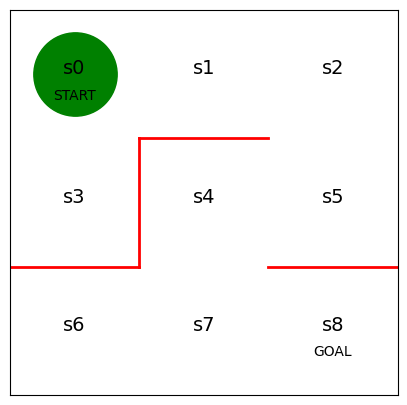

In [9]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
ax.set_xlim(0,3)
ax.set_ylim(0,3)

plt.plot([2,3],[1,1], color='red', linewidth=2)
plt.plot([0,1],[1,1], color='red', linewidth=2)
plt.plot([1,1],[1,2], color='red', linewidth=2)
plt.plot([1,2],[2,2], color='red', linewidth=2)

plt.text(0.5, 2.5, 's0', size=14, ha='center')
plt.text(1.5, 2.5, 's1', size=14, ha='center')
plt.text(2.5, 2.5, 's2', size=14, ha='center')
plt.text(0.5, 1.5, 's3', size=14, ha='center')
plt.text(1.5, 1.5, 's4', size=14, ha='center')
plt.text(2.5, 1.5, 's5', size=14, ha='center')
plt.text(0.5, 0.5, 's6', size=14, ha='center')
plt.text(1.5, 0.5, 's7', size=14, ha='center')
plt.text(2.5, 0.5, 's8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')
plt.tick_params(
    axis='both', which='both',
    bottom=False, top=False,
    right=False, left=False,
    labelbottom=False, labelleft=False
)
line, = ax.plot([0.5], [2.5], marker='o', color='g', markersize=60)

In [11]:
def init():
    line.set_data([],[])
    return line,
def animate(i):
    state = state_history[i]
    x = [(state % 3) + 0.5]
    y = [2.5 - int(state/3)]
    line.set_data(x,y)

In [12]:
anim = animation.FuncAnimation(
    fig,
    animate,
    frames=len(state_history),
    init_func=init,
    interval=200,
    repeat=False

)

In [13]:
HTML(anim.to_jshtml())